# Boreal ecoregion analysis

In [ ]:
#conda install -c conda-forge r-rnaturalearth rnaturalearthdata r-mapproj
#conda install -c conda-forge r-rnaturalearth r-rnaturalearthdata r-mapproj r-rgeos r-viridis r-wesanderson r-patchwork r-aws.s3 r-feather r-rockchalk

In [26]:
library(aws.s3)
library(rgdal)
library(raster)
library(tidyverse)
library(dplyr)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(data.table)

library(fs)
library(sf)
library(rgdal)


library(rgeos)
library(mapproj)
#library(rgee)
library(viridis)
library(wesanderson)
library(scales)
library(tools)
library(patchwork)

library(rnaturalearth)
library(rnaturalearthdata)
library(feather)



Warning message:
“package ‘viridis’ was built under R version 4.1.3”
Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


The following object is masked from ‘package:maps’:

    unemp


Warning message:
“package ‘wesanderson’ was built under R version 4.1.3”
Warning message:
“package ‘patchwork’ was built under R version 4.1.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:raster’:

    area




In [50]:
source('/projects/code/3dsi/boreal_map_functions.R') #'/home/pmontesa/code/3dsi/boreal_map_functions.R'

MAINDIR = '/projects/my-public-bucket/boreal_polar_map/paper_figs'#'/explore/nobackup/people/pmontesa/userfs02/data/LVIS'
WWF_FN = '/projects/my-public-bucket/databank/wwf_terr_ecos.gpkg' #'/explore/nobackup/people/pmontesa/userfs02/arc/wwf_terr_ecos.shp'
ext = extent(-180,180,40,90)
wwf_circ_dis_fn

[1] "MAAP"
[1] "MAAP"


/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.shp

In [55]:
head(eco_plot_data)
length(unique(eco_plot_data$ecoregion))

,X,ecoregion,tot_agb,p5_agb,p95_agb,area,norm_tot_agb
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,Southern Hudson Bay taiga,0.53150667,0.37083391,0.6921794,35657205,1.490601e-08
2,2,Central Canadian Shield forests,1.64444406,1.24287408,2.0460141,49114570,3.348180e-08
3,3,Eastern Canadian Shield taiga,0.96987777,0.67556634,1.2641892,184769000,5.249137e-09
4,4,Low Arctic tundra,0.10941199,0.06418665,0.1546373,48105900,2.274399e-09
5,5,Alaska-St. Elias Range tundra,0.20260819,0.10684998,0.2983664,8399490,2.412149e-08
6,6,Pacific Coastal Mountain icefields and tundra,0.09756191,0.05758794,0.1375359,6978530,1.398030e-08


[1] 48

[1] "Ecoregion count is: 98"


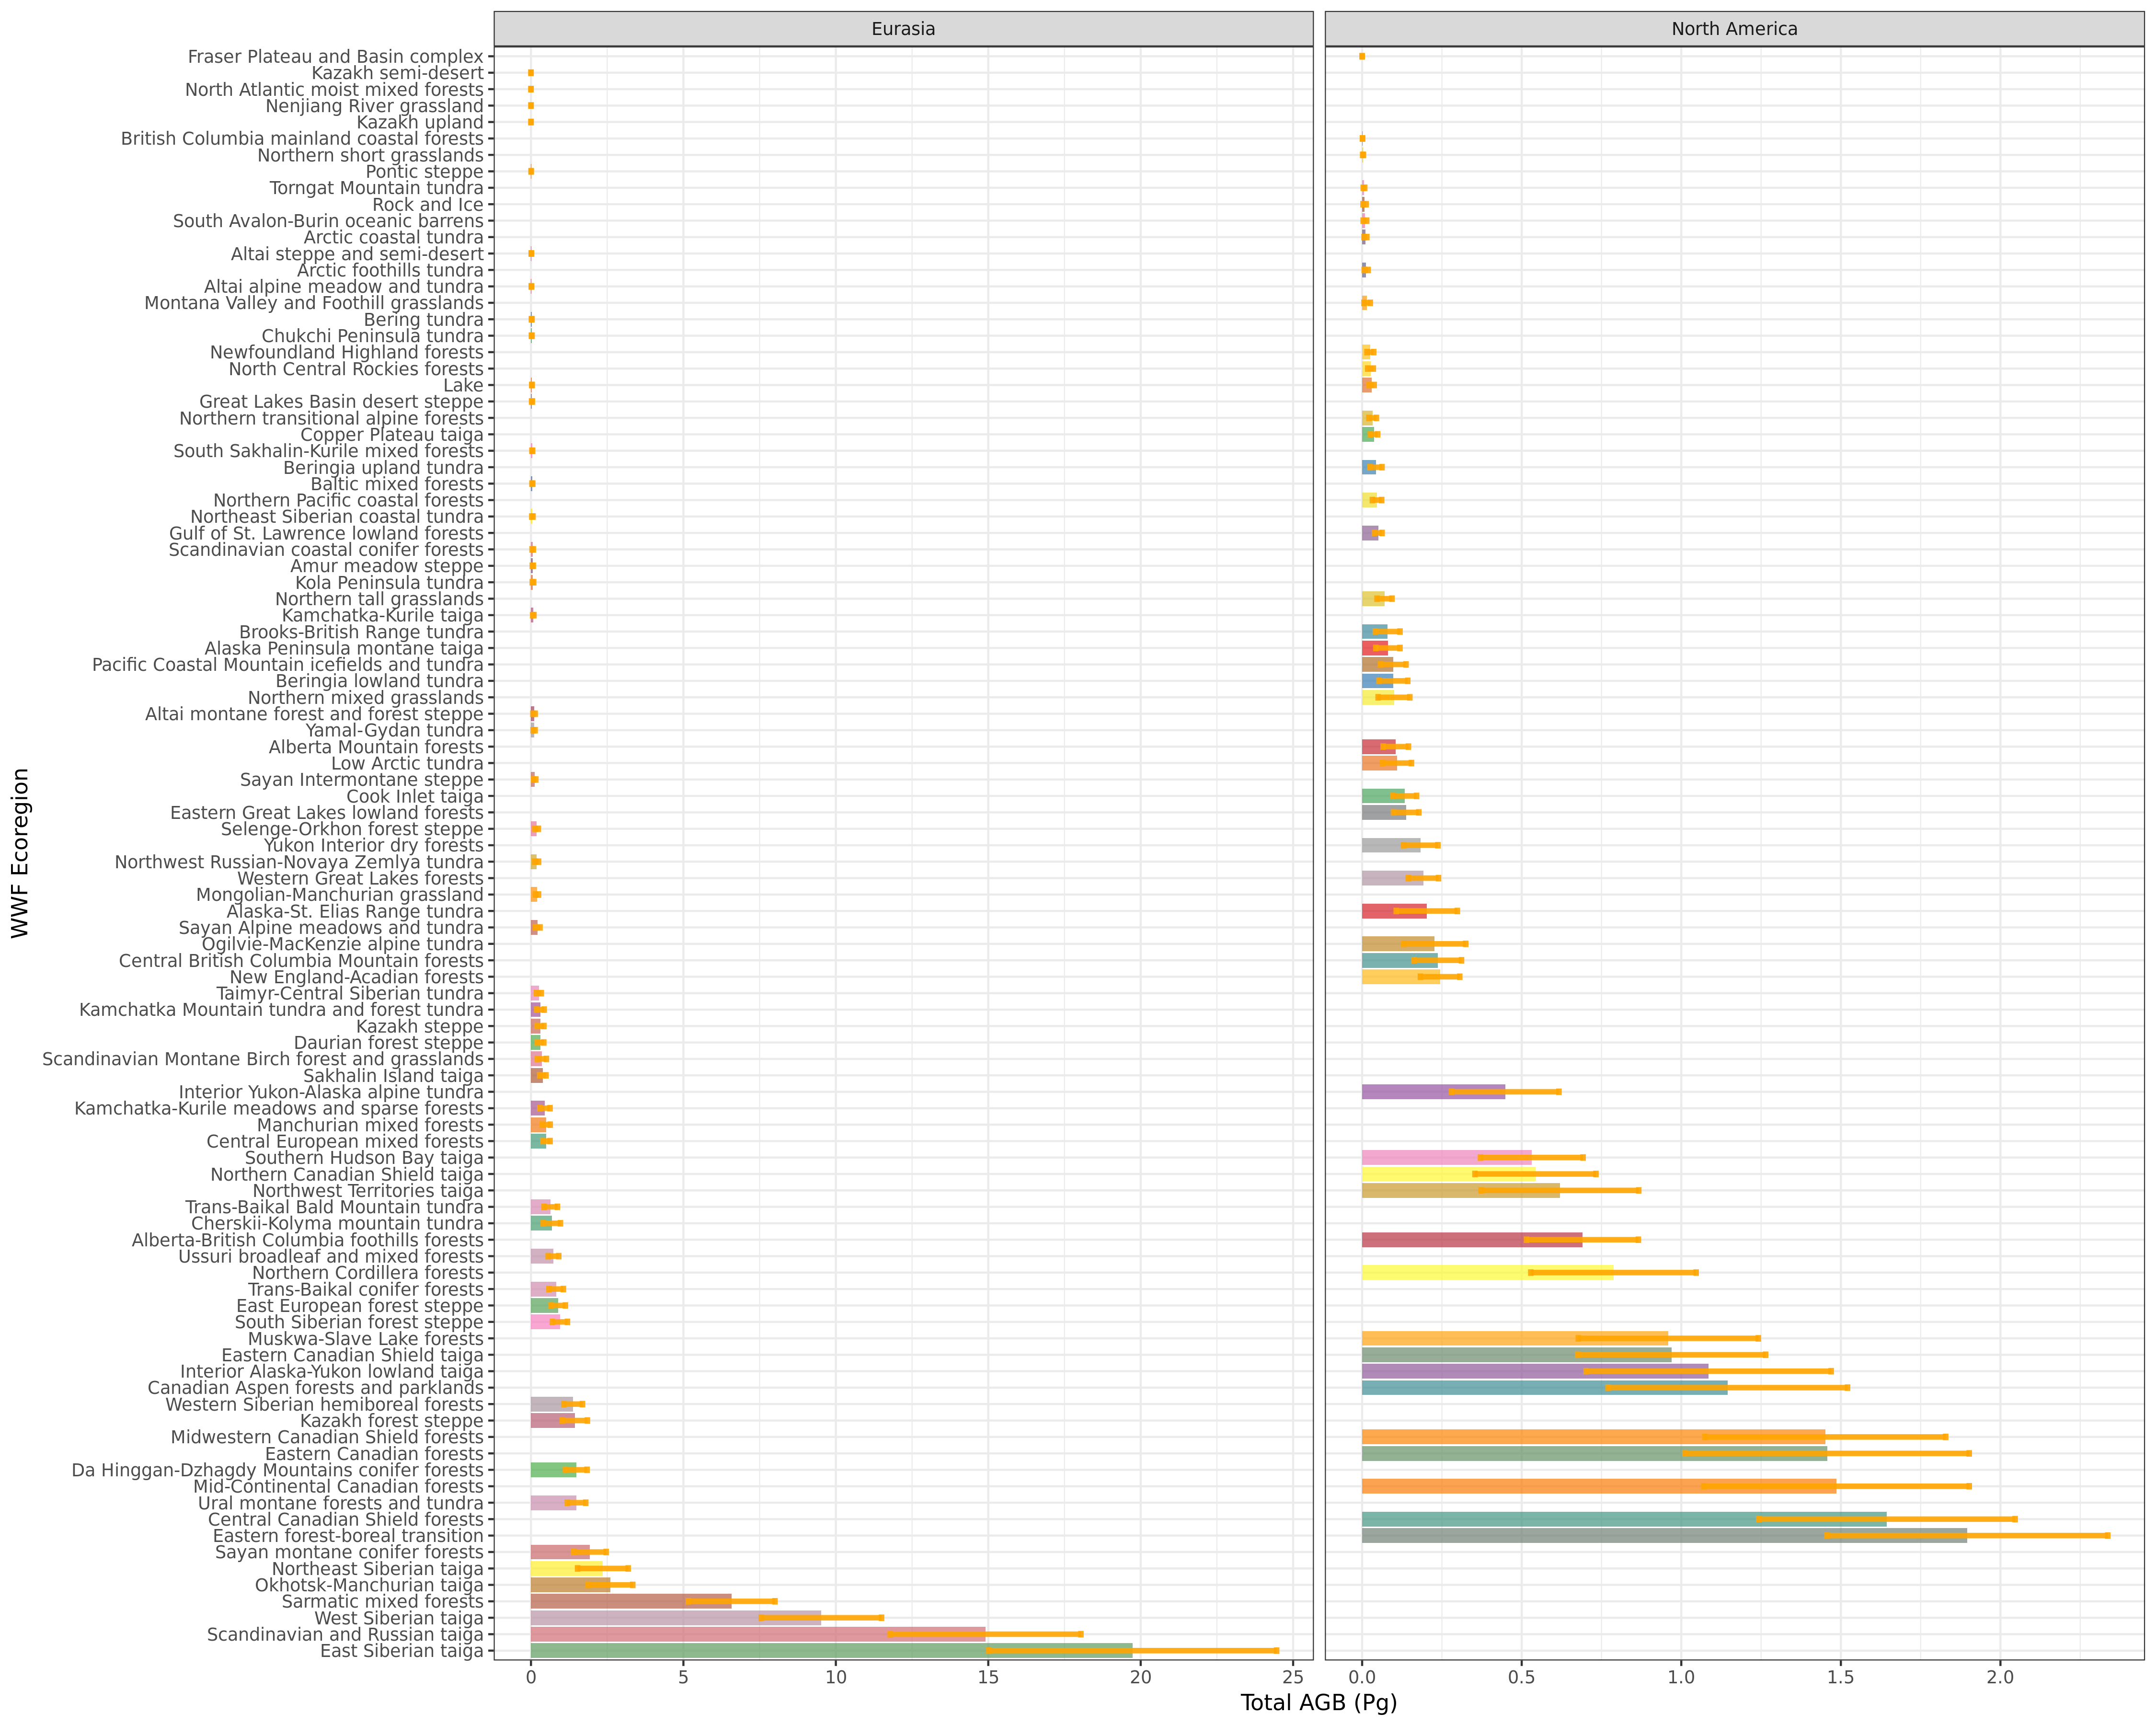

In [103]:
options(repr.plot.width=15, repr.plot.height=12)
# plotting total AGB

library(ggplot2)
library(dplyr)

eco_plot_data_na <- read.csv('/projects/shared-buckets/lduncanson/eco_summaries_northamerica.csv') #%>% dplyr::select(ecoregion)#,tot_agb,p5_agb,p95_agb,norm_tot_agb)
eco_plot_data_na$REALM = 'Nearctic'
eco_plot_data_na$CONT = 'North America'
eco_plot_data_eu <- read.csv('/projects/shared-buckets/lduncanson/eco_summaries_europe.csv')# %>% dplyr::select(ecoregion)#,tot_agb,p5_agb,p95_agb,norm_tot_agb)
eco_plot_data_eu$REALM = 'Palearctic'
eco_plot_data_eu$CONT = 'Eurasia'

eco_plot_data = rbind(eco_plot_data_na, eco_plot_data_eu)

colourCount = length(unique(eco_plot_data$ecoregion))
print(paste0("Ecoregion count is: ",colourCount))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))
ecoregion_colors <-getPalette(colourCount)
names(ecoregion_colors) <- levels(factor(eco_plot_data$ecoregion))

ggplot(eco_plot_data) +
        geom_bar( aes(x=reorder(ecoregion, -tot_agb), y=tot_agb, fill=factor(ecoregion)), stat="identity", alpha=0.7) +
        geom_errorbar( aes(x=reorder(ecoregion, -tot_agb), ymin=p5_agb, ymax=p95_agb), width=0.4, colour="orange", alpha=0.9, size=1.3) +
        scale_fill_manual(values = ecoregion_colors, name="Ecoregion", guide="none")+
        xlab("WWF Ecoregion") + ylab("Total AGB (Pg)") +
        theme(text = element_text(size = 12, angle=90), axis.title.x = element_blank()) +
        theme(axis.title.x = element_blank(), axis.title.y = element_text(size=14)) +
        facet_wrap(~CONT, ncol=2, scales='free_x')+
        theme_bw() +
coord_flip()

In [143]:
head(wwf_poly)

,long,lat,order,hole,piece,id,group,OBJECTID,AREA,PERIMETER,⋯,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,Shape_Leng,Shape_Area,area_km2,eco_code,clusterid
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<int>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
1,30.60972,61.50903,1,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga
2,30.59639,61.49654,2,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga
3,30.58638,61.49236,3,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga
4,30.57666,61.49181,4,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga
5,30.56972,61.49737,5,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga
6,30.56083,61.50237,6,FALSE,1,440,440.1,5649,6.816196,0.153,⋯,1,NA,0,0,0,0.1528742,0.001148822,2170288,PA0608,Scandinavian and Russian taiga


In [144]:
# Get shp as a mappable ecoregion polygon (not SF)
wwf_poly = shp_fort_join(WWF_FN, ext, REPROJECT=TRUE)  %>%
    dplyr::mutate(ecoregion = factor(ECO_NAME)) %>%
    dplyr::filter(ecoregion %in% levels(factor(eco_plot_data$ecoregion)) ) %>%
    dplyr::filter(!ecoregion %in% c('Lake', 'Rock and Ice'))

OGR data source with driver: GPKG 
Source: "/projects/my-public-bucket/databank/wwf_terr_ecos.gpkg", layer: "wwf_terr_ecos"
with 14458 features
It has 18 fields


Regions defined for each Polygons



In [159]:
# Use SF to get ecoregion centroids as mappable points
wwf_sf <- st_read(WWF_FN) %>% 
    dplyr::mutate(ecoregion = factor(ECO_NAME)) %>%
    dplyr::filter(ecoregion %in% levels(factor(eco_plot_data$ecoregion)) ) %>%
    dplyr::filter(!ecoregion %in% c('Lake', 'Rock and Ice')) %>%
  st_centroid() 

wwf_centroids = cbind(wwf_sf, st_coordinates(wwf_sf)) %>%
            dplyr::mutate(ecoregion = factor(ECO_NAME)) %>%
            dplyr::select(REALM, ecoregion, X, Y, ) %>%
            as.data.frame() 
wwf_centroids = wwf_centroids %>%
            dplyr::left_join(eco_plot_data %>% dplyr::select(!c(X, REALM)), by = 'ecoregion') %>%
            group_by(ecoregion, REALM) %>%
            dplyr::summarize(
                X_max = max(X),
                Y_max = max(Y),
                X_min = min(X),
                Y_min = min(Y),
                tot_agb = mean(tot_agb)
            )


Reading layer `wwf_terr_ecos' from data source 
  `/projects/my-public-bucket/databank/wwf_terr_ecos.gpkg' using driver `GPKG'
Simple feature collection with 14458 features and 18 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -89.89197 xmax: 180 ymax: 83.62313
Geodetic CRS:  WGS 84


Warning message in st_centroid.sf(.):
“st_centroid assumes attributes are constant over geometries of x”
`summarise()` has grouped output by 'ecoregion'. You can override using the `.groups` argument.



OGR data source with driver: ESRI Shapefile 
Source: "/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.shp", layer: "wwf_circumboreal_Dissolve"
with 2 features
It has 4 fields
Integer64 fields read as strings:  OBJECTID 


Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



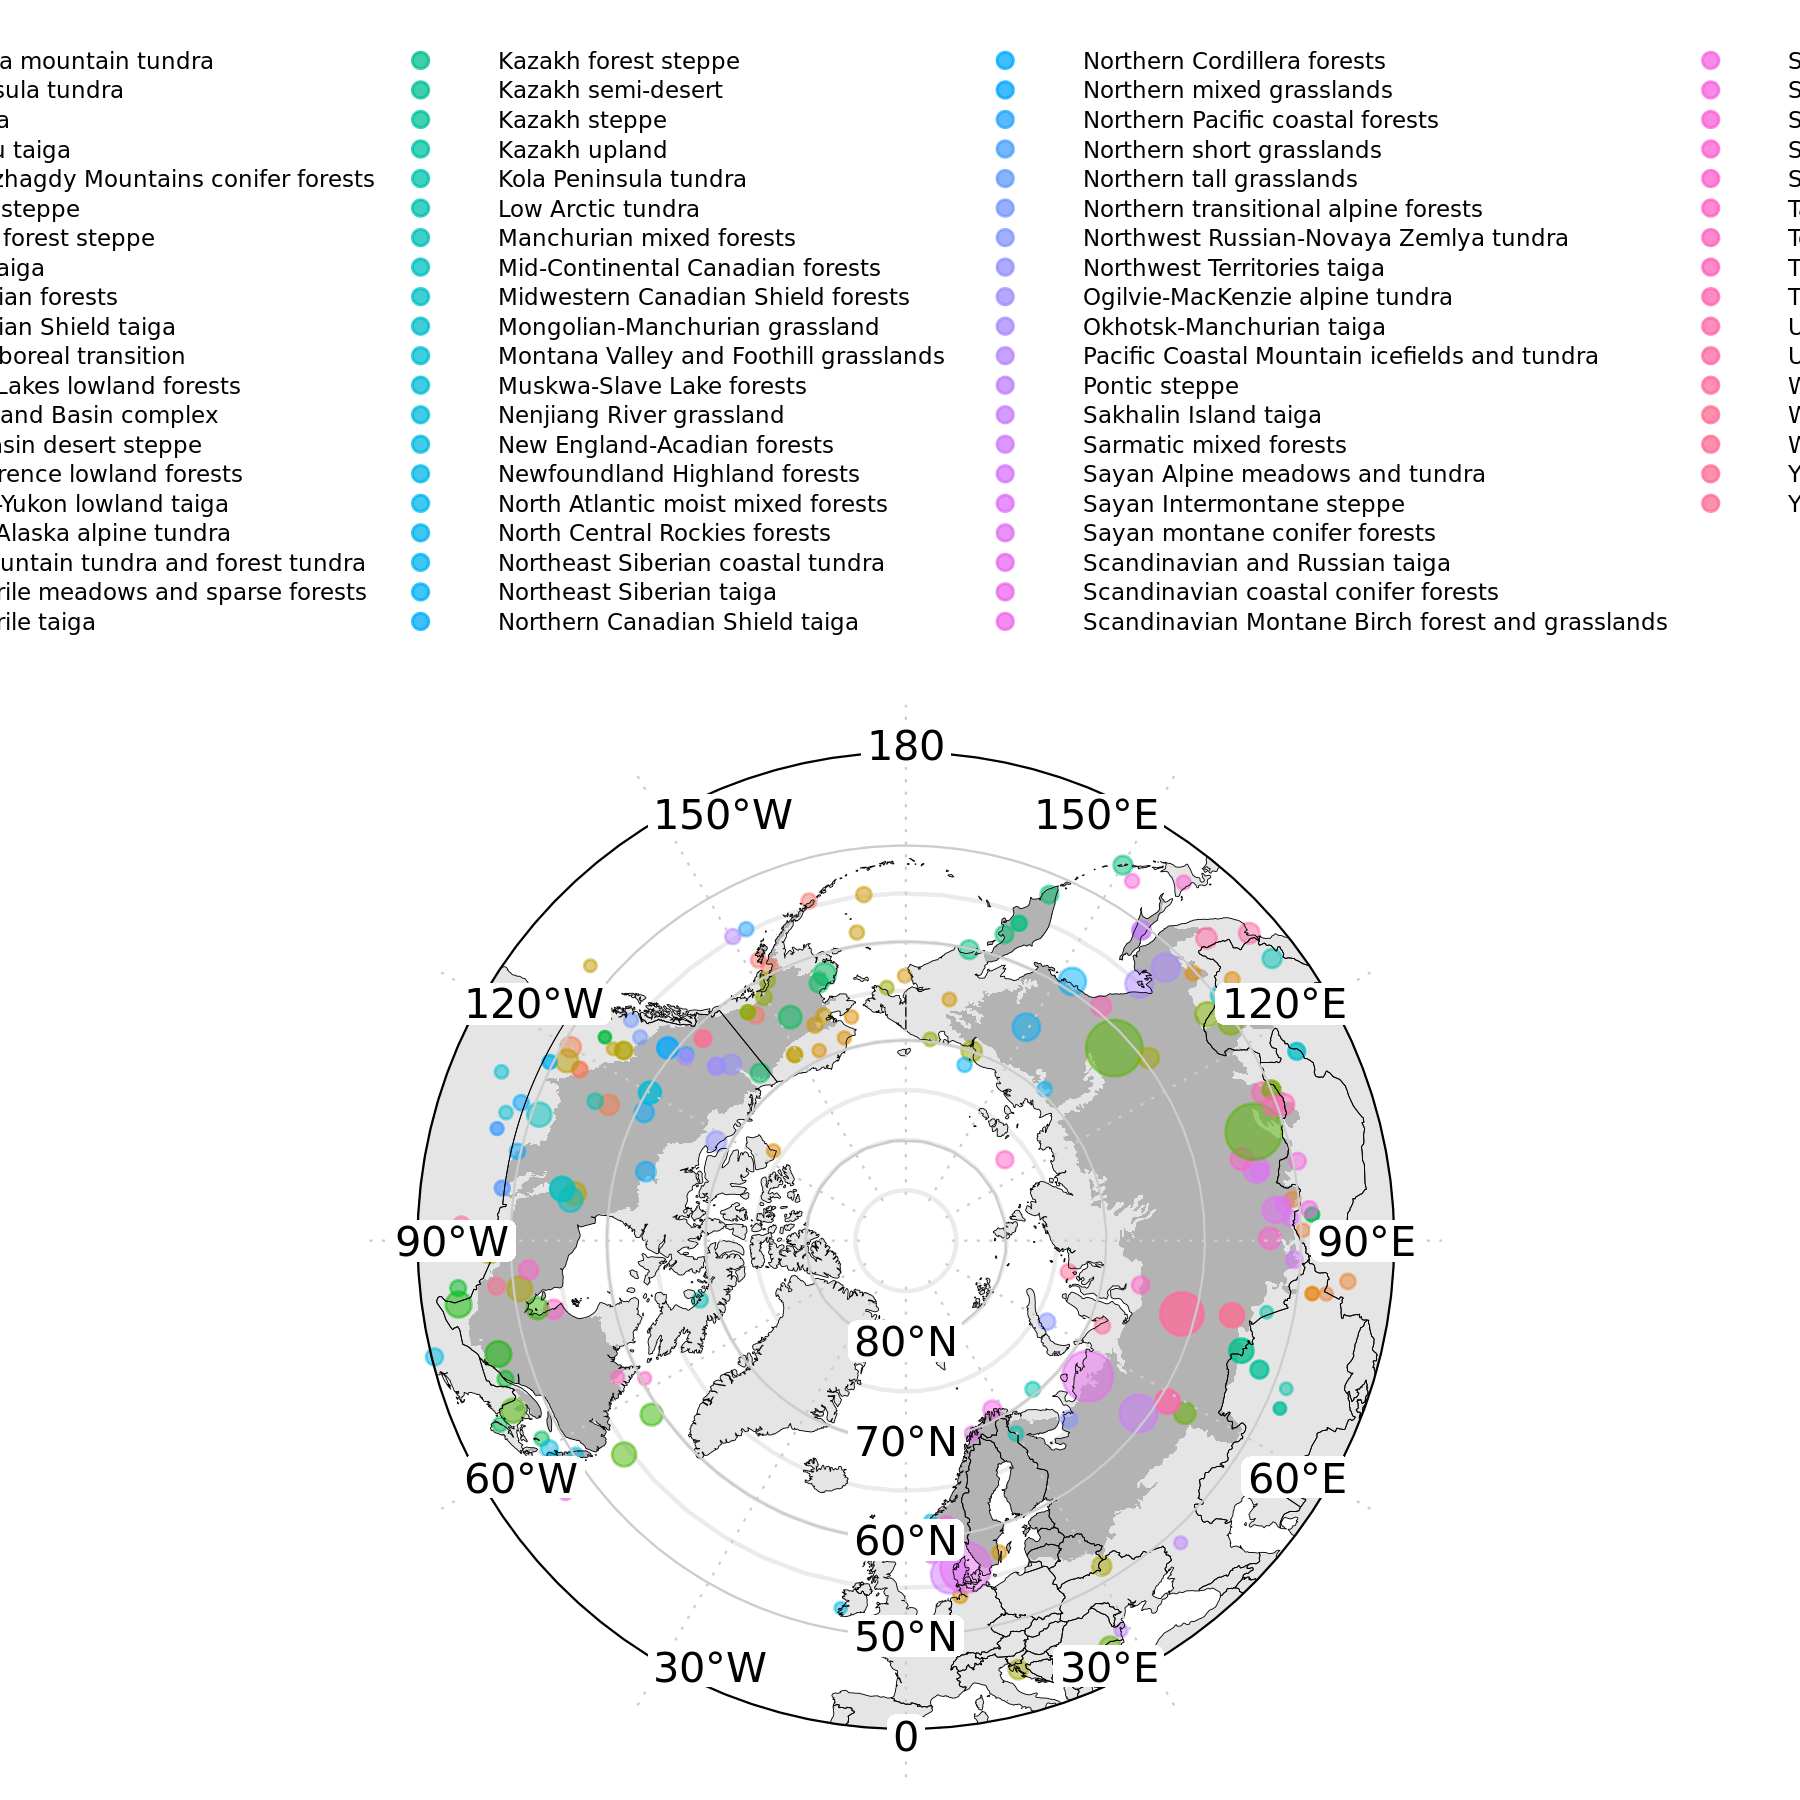

In [164]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext,  
                     BOREAL_SHP_FN = wwf_circ_dis_fn,    
                     LAYER_LIST = list(
                                     #geom_polygon(data = wwf_poly, aes(x = long, y = lat, group = group, fill=ecoregion), size=0.1)) , 
                                     geom_point(data = wwf_centroids, aes(x = X_max, y = Y_max, group=ecoregion, size=tot_agb, color=ecoregion), alpha=0.5),
                                     geom_point(data = wwf_centroids, aes(x = X_min, y = Y_min, group=ecoregion, size=tot_agb, color=ecoregion), alpha=0.5)
                                )
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    scale_fill_manual(values = ecoregion_colors, name="Ecoregion", guide='none')+
    guides(fill=guide_legend(title="Tile groups", title.position = "top", label.position = "bottom", keywidth = unit(.1, "cm"), keyheight = unit(.1, "cm"), nrow=5))
m_groups
    


In [ ]:
options(repr.plot.height = 8, repr.plot.width = 12, warn=-1)


crs_canalb <- "+proj=aea +lat_1=50 +lat_2=70 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

crs_wgs84 = "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs"

# https://www.r-bloggers.com/2019/04/zooming-in-on-maps-with-sf-and-ggplot2/
disp_win_wgs84 <- st_sfc(st_point(c(-145, 35)), st_point(c(-40, 75)), crs = 4326)
disp_win_trans <- st_transform(disp_win_wgs84, crs = crs_canalb)
disp_win_coord <- st_coordinates(disp_win_trans)

  txt_wgs84 <- st_sfc(st_point(c(-132, 63.5)), st_point(c(-120, 58)), st_point(c(-98, 58)), crs = 4326) #-121.5, 52.75
  txt_trans <- st_transform(txt_wgs84, crs = crs_canalb)
  txt_coord <- st_coordinates(txt_trans)
  
add_theme_custom = list(
        theme_bw(),
        theme(
            #legend.position = c(0.75 ,0.75), 
          legend.text=element_text(size=rel(1)), 
          #legend.background = element_blank(),
          legend.box.background = element_rect(colour = "black"),
          axis.title.x = element_blank(), 
          axis.title.y = element_blank(),
          axis.text = element_text(size = 10),
          axis.text.y = element_text(angle=90, hjust = 0.5)
          )
  )
  
custom_map_above = list(
    coord_sf(xlim = disp_win_coord[,'X'], ylim = disp_win_coord[,'Y'], crs = crs_canalb, expand = F),
    #annotation_scale(location = "bl", width_hint = 0.15) ,
    #annotate(geom = "text", x = txt_coord[,'X'], y = txt_coord[,'Y'], label = c("B o r e a l","ABoVE\ndomain","ABoVE\nextended\ndomain"), fontface = c("bold.italic", "italic", "italic"), color = c("grey60","black","black"), size = c(4,3,2)) ,
    add_theme_custom
)
  
# Get range of SI_50
tmp_SI_focal_95 = SI_all_join %>% 
                dplyr::filter(clusterid %in% completed_clusters$clusterid)  %>% 
                droplevels() %>% 
                dplyr::filter(ht_can_quantile_name == 95) %>% dplyr::select(clusterid, !!sym(FOCAL_SI_NAME)) %>% dplyr::rename(SI_focal_95 = !!sym(FOCAL_SI_NAME)) %>%
                left_join(SI_all_join %>% filter(ht_can_quantile_name == 5) %>% dplyr::select(clusterid, !!sym(FOCAL_SI_NAME)) %>% dplyr::rename(SI_focal_5 = !!sym(FOCAL_SI_NAME)), by = 'clusterid') %>%
                dplyr::mutate(SI_focal_range = SI_focal_95 - SI_focal_5)

# Subset WWF according to the clusters we have SI_50 for, and join with SI_50
wwf_sf = st_as_sf(st_read(WWF_FN)) %>%
    dplyr::mutate(clusterid = factor(ECO_NAME)) %>%
    #dplyr::mutate(clusterid = factor(str_replace(ECO_NAME, " ","\n"))) %>%
    dplyr::filter(clusterid %in% levels(tmp_SI_all_join$clusterid_reorder)) %>%
    #dplyr::left_join(SI_all_join %>% dplyr::filter(ht_can_quantile_name == 95) %>% dplyr::select(clusterid, SI_50) , by = c("clusterid")) 
    dplyr::left_join(tmp_SI_focal_95 , by = c("clusterid"))
    
# Write wwf subset for use locally to make a Study Area map
#st_write(wwf_sf, '/explore/nobackup/people/pmontesa/userfs02/arc/wwf_terr_ecos_subset_regionalSI.gpkg')

Y_MAX = round(max(wwf_sf$SI_focal_95)+1, dig=0)
Y_MIN = round(min(wwf_sf$SI_focal_95), dig=0)

colourCount = length(unique(wwf_sf$clusterid))
print(paste0("Cluster count is: ",colourCount))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))


ecoregion_colors <-getPalette(colourCount)
names(ecoregion_colors) <- levels(factor(wwf_sf$clusterid))


m_SI_ecoregions = do_map_above_boreal(ABOVE_DOMAIN=FALSE)  +
    #labs(title = expression("Upper limit of boreal forest growth: "~SI[50]^95^th)) +
    geom_sf(data = wwf_sf, aes(fill=clusterid), color='black', show.legend = TRUE, size=0.1) +
    #scale_fill_continuous(type = "viridis", name=substitute("SI"[i]~95^th~"[m]", list(i=FOCAL_SI_VAL)), limits=c(Y_MIN,Y_MAX), breaks=c(Y_MIN,15,Y_MAX)) +
    scale_fill_manual(values = ecoregion_colors, name="Ecoregion")+
    #scale_fill_brewer(palette="Set1", name='Ecoregion')+
    #labs(title = expression("Range in boreal forest growth: "~SI[50]^95^th~"-"~SI[50]^5^th)) +
    #geom_sf(data = wwf_sf, aes(fill=SI_50_range), color='black', show.legend = TRUE) +
    #scale_fill_continuous(type = "viridis", name=expression("SI"[50]~" range [m]")) +
    custom_map_above +
    theme(legend.title = element_text(angle = 0), axis.text=element_text(size=20)) #+
    #guides(fill = guide_colorbar(title.position = "left")) #+ geom_sf_label(data=wwf_sf, aes(label=clusterid), fill = "white", fun.geometry = sf::st_centroid)

m_SI_ecoregions
# ggsave(m_SI_ecoregions,
#               file = path(plot_dir_lvis, 'm_SI_ecoregions.png'),
#               device = 'png', dpi = 300, height = 3, width = 5)